In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/tanish/Downloads/covid_early_stage_symptoms.csv')

In [3]:
df.head()

,gender,age_year,fever,cough,runny_nose,muscle_soreness,pneumonia,diarrhea,lung_infection,travel_history,isolation_treatment,SARS-CoV-2 Positive
0,male,89,1,1,0,0,0,0,0,1,0,0
1,male,68,1,0,0,0,0,0,0,0,0,0
2,male,68,0,0,0,0,0,0,0,1,0,0
3,male,68,1,1,0,0,0,0,0,1,1,1
4,male,50,1,1,1,0,1,0,0,1,0,1


In [4]:
df['Covid_+ve'] = df['SARS-CoV-2 Positive']
df.drop('SARS-CoV-2 Positive', axis=1, inplace=True)

In [5]:
df.head()

,gender,age_year,fever,cough,runny_nose,muscle_soreness,pneumonia,diarrhea,lung_infection,travel_history,isolation_treatment,Covid_+ve
0,male,89,1,1,0,0,0,0,0,1,0,0
1,male,68,1,0,0,0,0,0,0,0,0,0
2,male,68,0,0,0,0,0,0,0,1,0,0
3,male,68,1,1,0,0,0,0,0,1,1,1
4,male,50,1,1,1,0,1,0,0,1,0,1


In [6]:
df.shape

(6512, 12)

<Axes: xlabel='Covid_+ve', ylabel='count'>

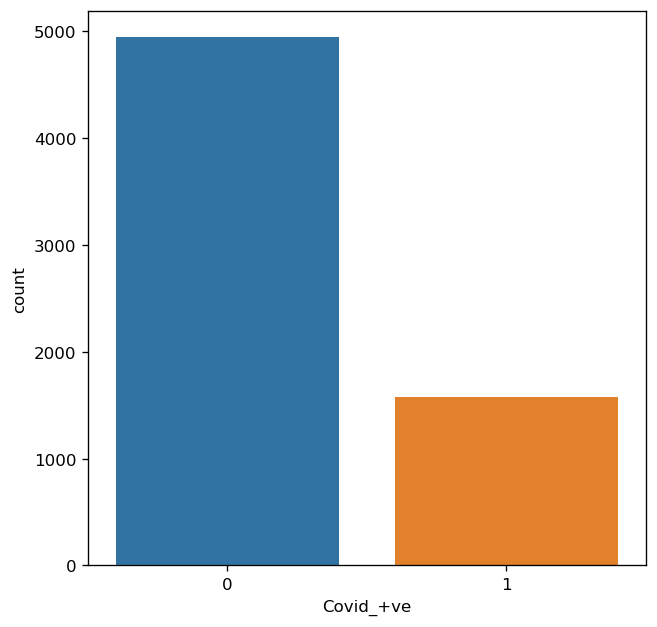

In [7]:
plt.figure(figsize=(6, 6), dpi=120)
sns.countplot(x=df['Covid_+ve'])

<Axes: xlabel='gender', ylabel='count'>

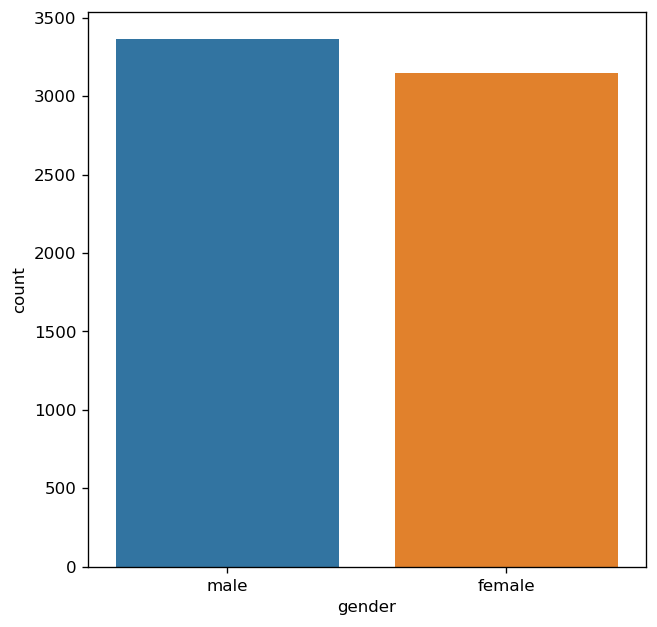

In [8]:
plt.figure(figsize=(6, 6), dpi=120)
sns.countplot(x=df['gender'])

<Axes: xlabel='age_year', ylabel='Count'>

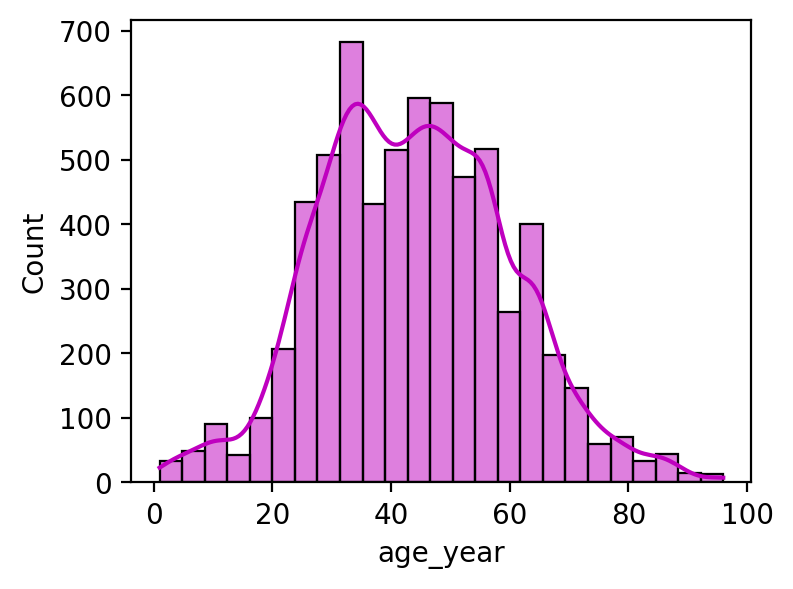

In [9]:
plt.figure(figsize=(4, 3), dpi=200)
sns.histplot(x = df['age_year'], bins=25, color='m', kde=True)

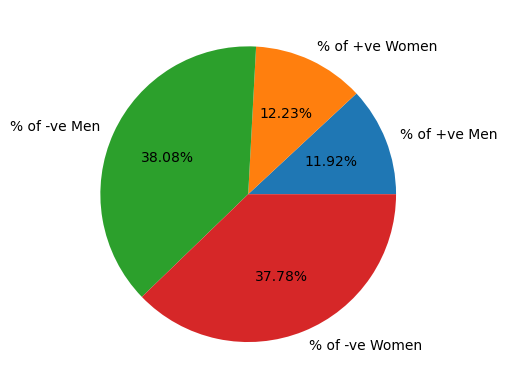

In [10]:
male_per_pos = round(100*(len(df[(df['gender'] == 'male') &( df['Covid_+ve'] == 1)])/len(df[df['gender'] == 'male'])), 2)
female_per_pos = round(100*(len(df[(df['gender'] == 'female') &( df['Covid_+ve'] == 1)])/len(df[df['gender'] == 'female'])), 2)

y = np.array([male_per_pos, female_per_pos, 100-male_per_pos, 100-female_per_pos])
mylabels = ["% of +ve Men", "% of +ve Women", "% of -ve Men", "% of -ve Women"]

plt.pie(y, labels = mylabels, autopct='%1.2f%%')
plt.show() 

In [11]:
df['gender'] = pd.get_dummies(df['gender'], drop_first=True)

In [12]:
df.head()

,gender,age_year,fever,cough,runny_nose,muscle_soreness,pneumonia,diarrhea,lung_infection,travel_history,isolation_treatment,Covid_+ve
0,1,89,1,1,0,0,0,0,0,1,0,0
1,1,68,1,0,0,0,0,0,0,0,0,0
2,1,68,0,0,0,0,0,0,0,1,0,0
3,1,68,1,1,0,0,0,0,0,1,1,1
4,1,50,1,1,1,0,1,0,0,1,0,1


<Axes: >

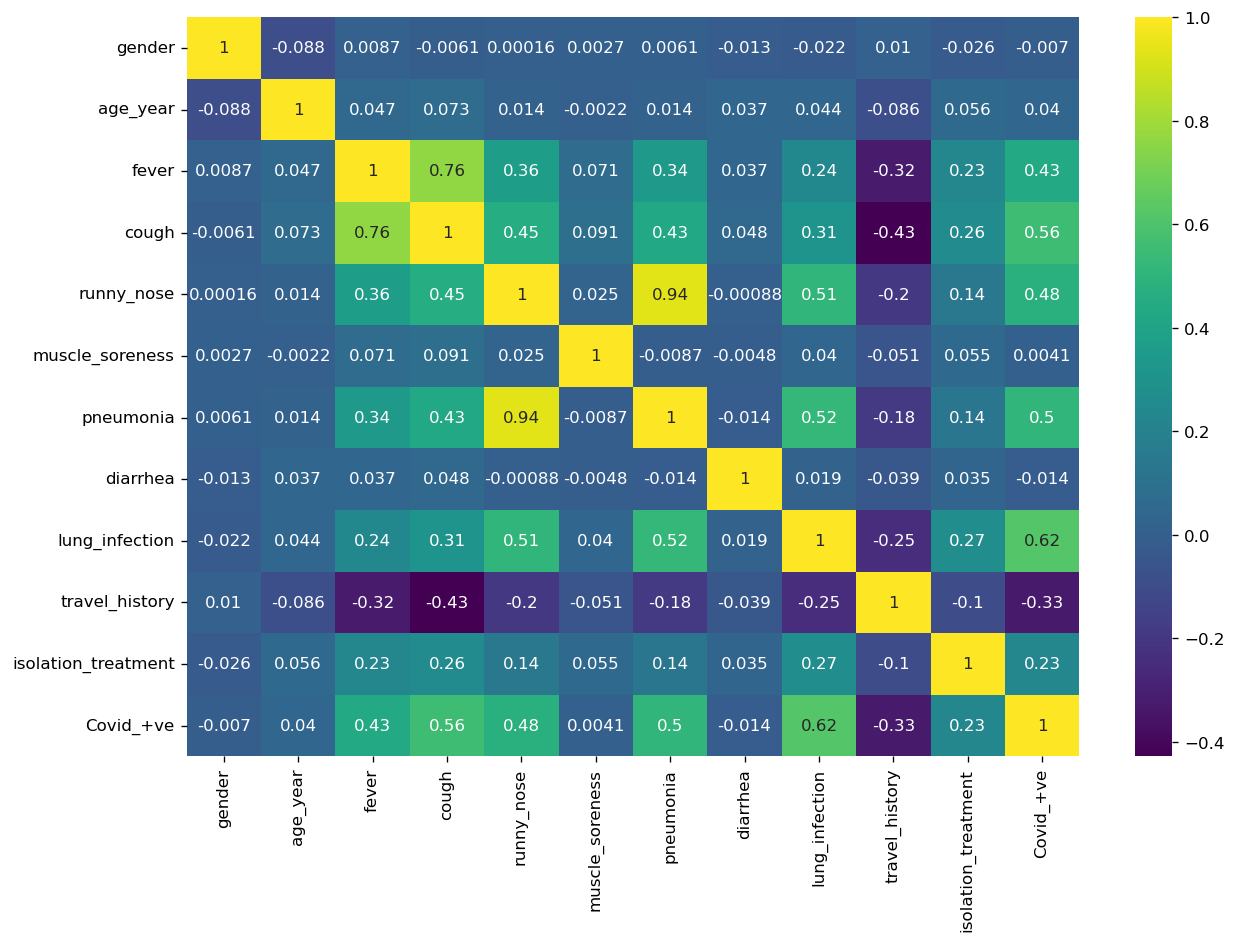

In [13]:
plt.figure(figsize=(12, 8), dpi=120)
sns.heatmap(df.corr(), annot=True, cmap='viridis')

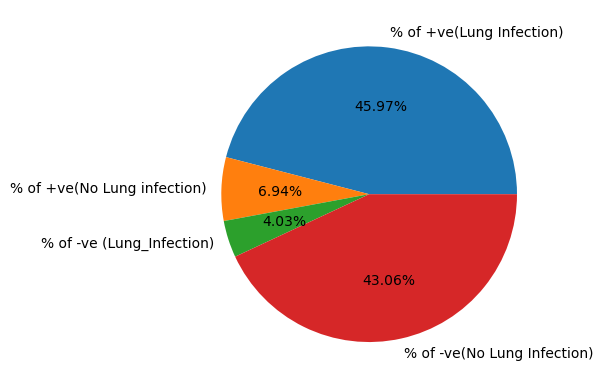

In [14]:
lung_inf_pos = round(100*(len(df[(df['lung_infection'] == 1) &( df['Covid_+ve'] == 1)])/len(df[df['lung_infection'] == 1])), 2)
no_lung_inf_pos = round(100*(len(df[(df['lung_infection'] == 0) &( df['Covid_+ve'] == 1)])/len(df[df['lung_infection'] == 0])), 2)

y = np.array([lung_inf_pos, no_lung_inf_pos, 100-lung_inf_pos, 100-no_lung_inf_pos])
mylabels = ["% of +ve(Lung Infection)", "% of +ve(No Lung infection)", "% of -ve (Lung_Infection)", "% of -ve(No Lung Infection)"]

plt.pie(y, labels = mylabels, autopct='%1.2f%%')
plt.show() 

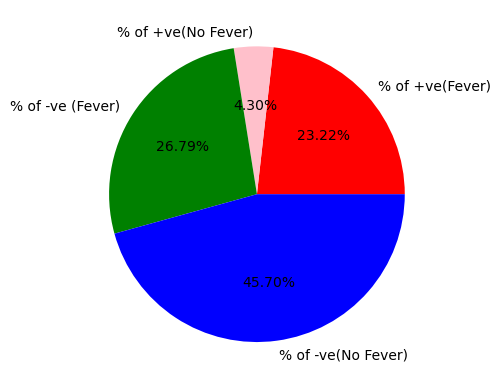

In [15]:
fev_pos = round(100*(len(df[(df['fever'] == 1) &( df['Covid_+ve'] == 1)])/len(df[df['fever'] == 1])), 2)
no_fev_pos = round(100*(len(df[(df['fever'] == 0) &( df['Covid_+ve'] == 1)])/len(df[df['fever'] == 0])), 2)

y = np.array([fev_pos, no_fev_pos, 100-fev_pos, 100-no_fev_pos])
mylabels = ["% of +ve(Fever)", "% of +ve(No Fever)", "% of -ve (Fever)", "% of -ve(No Fever)"]

plt.pie(y, labels = mylabels, autopct='%1.2f%%', colors = ['red', 'pink', 'green', 'blue'])
plt.show() 

In [16]:
df['age_year'] = df['age_year']/100

In [17]:
df.head()

,gender,age_year,fever,cough,runny_nose,muscle_soreness,pneumonia,diarrhea,lung_infection,travel_history,isolation_treatment,Covid_+ve
0,1,0.89,1,1,0,0,0,0,0,1,0,0
1,1,0.68,1,0,0,0,0,0,0,0,0,0
2,1,0.68,0,0,0,0,0,0,0,1,0,0
3,1,0.68,1,1,0,0,0,0,0,1,1,1
4,1,0.50,1,1,1,0,1,0,0,1,0,1


In [18]:
X = df.drop('Covid_+ve', axis=1)
y = df['Covid_+ve']

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=101)

In [21]:
# Model Deployment
conf_mat = {}
accuracy = {}
best_param = {}

def model_testing(model_name, model, param_grid_):
    grid = GridSearchCV(model, param_grid=param_grid_)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    
    accuracy[model_name] = accuracy_score(y_test, y_pred)
    con_mat = confusion_matrix(y_test, y_pred)
    conf_mat[model_name] = con_mat
    
    best_param[model_name] = grid.best_params_
    
    

In [22]:
# Logistic Regression
log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)
param_grid_log = {'C':np.logspace(0, 4, 10), 'penalty': ['l1', 'l2']}
model_testing('Logistic_Regression', log_model, param_grid_log)



In [23]:
# Support Vector  
svm_model = SVC()
param_grid_svm = {'kernel': ['linear', 'rbf', 'poly'],
             'C': [0.01 ,0.1, 1, 10, 100], 
             'degree': [2, 3, 4]}
model_testing('SVM', svm_model, param_grid_svm)

In [24]:
# KNN
knn_model = KNeighborsClassifier();
param_grid_knn = {'n_neighbors': list(range(25))};
model_testing('KNN', knn_model, param_grid_knn);

/Users/tanish/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/tanish/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tanish/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py", line 213, in fit
    self._validate_params()
  File "/Users/tanish/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 581, in _validate_params
    validate_parameter_constraints(
 

In [25]:
for i in accuracy:
    print(f" Model {i} --> Accuracy {100*accuracy[i]}")
    
# Thus SVM has best accuracy

 Model Logistic_Regression --> Accuracy 88.94736842105263
 Model SVM --> Accuracy 89.82456140350877
 Model KNN --> Accuracy 89.64912280701755


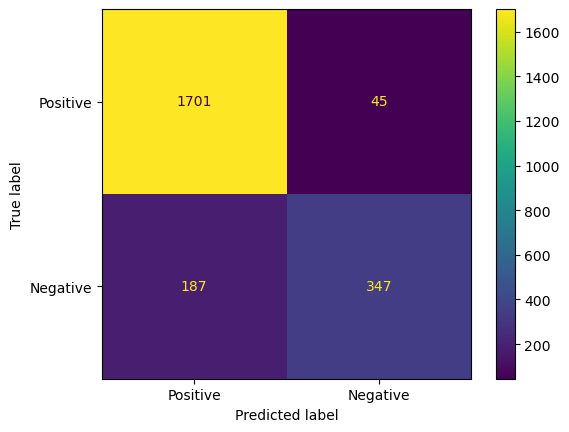

In [26]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_mat['SVM'], display_labels = ["Positive", "Negative"])
cm_display.plot()
plt.show()

In [27]:
best_param['SVM']

{'C': 1, 'degree': 2, 'kernel': 'poly'}

In [28]:
final_model = SVC(C=1, degree=2, kernel='poly', probability=True)

In [29]:
final_model.fit(X_train, y_train)

SVC(C=1, degree=2, kernel='poly', probability=True)

In [32]:
m = {}
for i in df.columns[:-1]:
    m[i] = 0

gen = int(input("Enter 0 for male, 1 for female: "))
m['gender'] = gen

age = int(input("Enter your age: "))
m['age_year'] = age/100

fever = int(input("Enter 1 if you have fever, else 0:  "))
m['fever'] = fever

cough = int(input("Enter 1 if you have cough, else 0:  "))
m['cough'] = cough

rn = int(input("Enter 1 if you have runny_nose, else 0:  "))
m['runny_nose'] = rn

ms = int(input("Enter 1 if you have muscle_soreness, else 0:  "))
m['muscle_soreness'] = ms

pne = int(input("Enter 1 if you have pneumonia, else 0:  "))
m['pneumonia'] = pne

di = int(input("Enter 1 if you have diarrhea, else 0:  "))
m['diarrhea'] = di

lf = int(input("Enter 1 if you have lung infection, else 0:  "))
m['lung_infection'] = lf

th = int(input("Enter 1 if you have recently travelled, else 0:  "))
m['travel_history'] = th


predictors = [list(m.values())]
outcome = final_model.predict(predictors)[0]
prob = final_model.predict_proba(predictors)[0]

if outcome == 0:
    print("You don't have Covid: ")
    print(f"Probablity of the outcome is {round(prob[0]*100, 2)}%. ")
else:
    print("You have Covid: ")
    print(f"Probablity of the outcome is {round(prob[1]*100, 2)}%. ")
    
if outcome == 1 and prob[1] > 0.80:
    print(f"Consult Doctor Immediately: ")



Enter 0 for male, 1 for female: 0
Enter your age: 50
Enter 1 if you have fever, else 0:  1
Enter 1 if you have cough, else 0:  1
Enter 1 if you have runny_nose, else 0:  1
Enter 1 if you have muscle_soreness, else 0:  0
Enter 1 if you have pneumonia, else 0:  1
Enter 1 if you have diarrhea, else 0:  0
Enter 1 if you have lung infection, else 0:  0
Enter 1 if you have recently travelled, else 0:  1
[[0, 0.5, 1, 1, 1, 0, 1, 0, 0, 1, 0]]
You have Covid: 
Probablity of the outcome is 83.39%. 
Consult Doctor Immediately: 


/Users/tanish/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/tanish/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [33]:
from joblib import dump, load

In [34]:
dump(final_model, "Covid.joblib")

['Covid.joblib']